In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
#PREPROCESS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '/content/drive/MyDrive/muskanchughani/data.csv'
data = pd.read_csv(file_path)

# Drop the 'id' column
data = data.drop(columns=['id','Unnamed: 32'])
data.head(10)
missing_values = data.isna().sum()
print(missing_values)


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


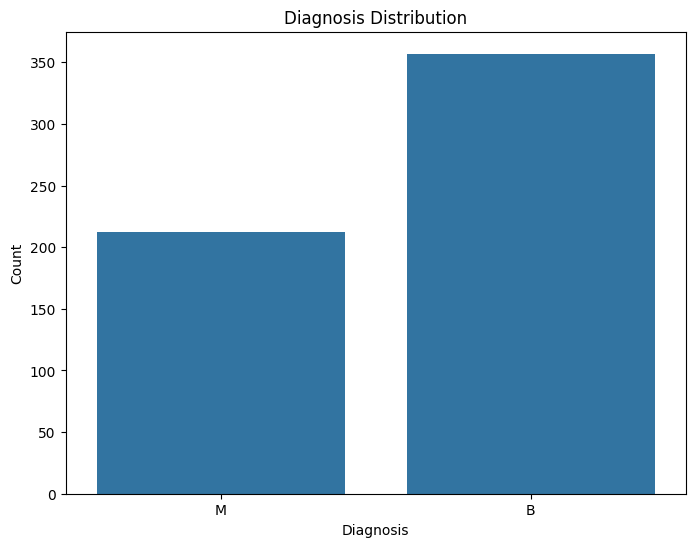

In [4]:
# Load original data to access the original 'diagnosis' column
original_data = pd.read_csv(file_path)

# Bar graph for the 'diagnosis' column
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=original_data)
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


In [5]:
missing_values = data.isna().sum()
print(missing_values)
# Convert categorical columns (e.g., 'diagnosis') to numerical using label encoding
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Split the data into features and target
X = data.drop(columns=['diagnosis'])  # Assuming 'diagnosis' is the target column
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Apply each model and store results
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    results[model_name] = accuracy

    # Print results
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("\n")

# Summary of accuracy scores
print("Summary of Accuracy Scores:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
--- Random Forest ---
Accuracy: 0.9708
Confusion Matrix:
[[107   1]
 [  4  59]]
Classifi

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
Accuracy: 0.9649
Confusion Matrix:
[[106   2]
 [  4  59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



--- Naive Bayes ---
Accuracy: 0.9415
Confusion Matrix:
[[104   4]
 [  6  57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



--- K-Nearest Neighbors ---
Accuracy: 0.9591
Confusion Matrix:
[[107   1]
 [  6  57]]
Classification Report:
              precision

Explained variance ratio by PCA components:
[0.34798555 0.19698601 0.08376982 0.06501926 0.04925518 0.02799182
 0.02304774 0.01849982 0.01767325 0.01445991]
Selected features:
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


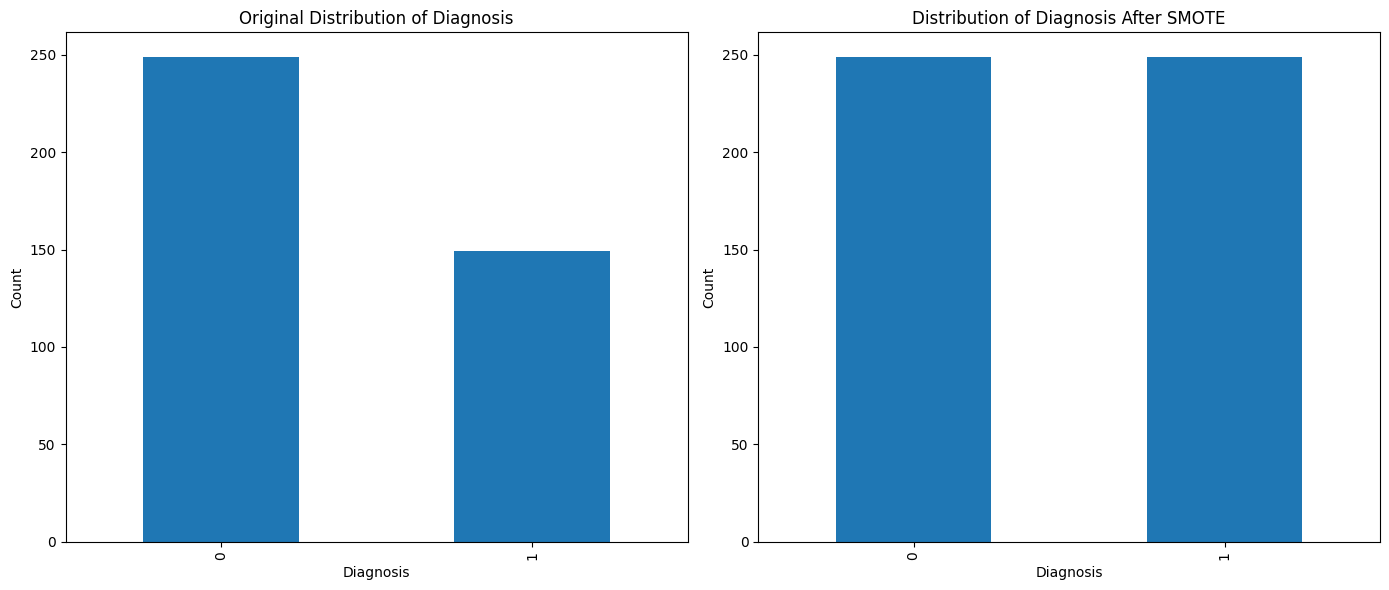

--- Random Forest ---
Confusion Matrix:
[[91 17]
 [16 47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       108
           1       0.73      0.75      0.74        63

    accuracy                           0.81       171
   macro avg       0.79      0.79      0.79       171
weighted avg       0.81      0.81      0.81       171



--- Decision Tree ---
Confusion Matrix:
[[86 22]
 [16 47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       108
           1       0.68      0.75      0.71        63

    accuracy                           0.78       171
   macro avg       0.76      0.77      0.77       171
weighted avg       0.78      0.78      0.78       171



--- Logistic Regression ---
Confusion Matrix:
[[100   8]
 [ 22  41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load data
# data = pd.read_csv('your_data.csv')  # Replace with your data loading method

# Split the data into features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Engineering
# 1. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Feature Creation (Polynomial Features)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# 3. Dimensionality Reduction (PCA)
pca = PCA(n_components=10)  # Number of components can be tuned
X_train_pca = pca.fit_transform(X_train_poly)
X_test_pca = pca.transform(X_test_poly)

# Print PCA Explained Variance
print("Explained variance ratio by PCA components:")
print(pca.explained_variance_ratio_)

# Feature Selection using RFE with RandomForestClassifier
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
X_train_rfe = rfe.fit_transform(X_train_pca, y_train)
X_test_rfe = rfe.transform(X_test_pca)

# Print selected features
selected_features = pd.DataFrame(X_train_pca).columns[rfe.support_]
print("Selected features:")
print(selected_features)

# Plot the original distribution of 'diagnosis'
plt.figure(figsize=(14, 6))

# Original class distribution
plt.subplot(1, 2, 1)
pd.Series(y_train).value_counts().plot(kind='bar')
plt.title('Original Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_rfe, y_train)

# Plot the distribution after SMOTE
plt.subplot(1, 2, 2)
pd.Series(y_train_resampled).value_counts().plot(kind='bar')
plt.title('Distribution of Diagnosis After SMOTE')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Apply each model and store results
for model_name, model in models.items():
    # Train the model with resampled data
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    predictions = model.predict(X_test_rfe)

    # Print results
    print(f"--- {model_name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("\n")
